In [2]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
import sys

assert sys.version_info >= (3, 7)

In [4]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

###                                                                ___Data Overview___

In [5]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [7]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [8]:
df.sample()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
59596,59597,I agree,I code primarily as a hobby,Under 18 years old,"Independent contractor, freelancer, or self-em...",Remote,Hobby;Contribute to open-source projects;Freel...,Primary/elementary school,Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [10]:
# Look for numerical columns that could be targets

numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Potential regression targets:")
for col in numerical_cols:
    print(f"{col}: {df[col].describe()}")

Potential regression targets:
ResponseId: count    89184.000000
mean     44592.500000
std      25745.347541
min          1.000000
25%      22296.750000
50%      44592.500000
75%      66888.250000
max      89184.000000
Name: ResponseId, dtype: float64
CompTotal: count    4.822500e+04
mean     1.036807e+42
std      2.276847e+44
min      0.000000e+00
25%      6.300000e+04
50%      1.150000e+05
75%      2.300000e+05
max      5.000000e+46
Name: CompTotal, dtype: float64
WorkExp: count    43579.000000
mean        11.405126
std          9.051989
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         50.000000
Name: WorkExp, dtype: float64
ConvertedCompYearly: count    4.801900e+04
mean     1.031101e+05
std      6.814188e+05
min      1.000000e+00
25%      4.390700e+04
50%      7.496300e+04
75%      1.216410e+05
max      7.435143e+07
Name: ConvertedCompYearly, dtype: float64


### ___EDA___

In [11]:
# Get all object columns from your selected features
selected_features = ['EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 
                    'TechList', 'LanguageHaveWorkedWith', 'PlatformHaveWorkedWith', 
                    'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'WorkExp', 
                    'Industry', 'ProfessionalTech']

# Check which are object vs numeric
for col in selected_features:
    print(f"{col}: {df[col].dtype}")

EdLevel: object
YearsCode: object
YearsCodePro: object
DevType: object
OrgSize: object
TechList: object
LanguageHaveWorkedWith: object
PlatformHaveWorkedWith: object
WebframeHaveWorkedWith: object
ToolsTechHaveWorkedWith: object
WorkExp: float64
Industry: object
ProfessionalTech: object


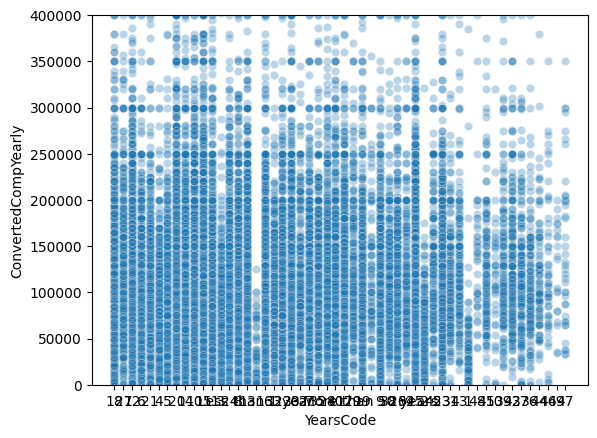

In [12]:
sns.scatterplot(x='YearsCode', y='ConvertedCompYearly', data=df, alpha=0.3)
plt.ylim(0, df['ConvertedCompYearly'].quantile(0.99))  # zoom out outliers
plt.show()

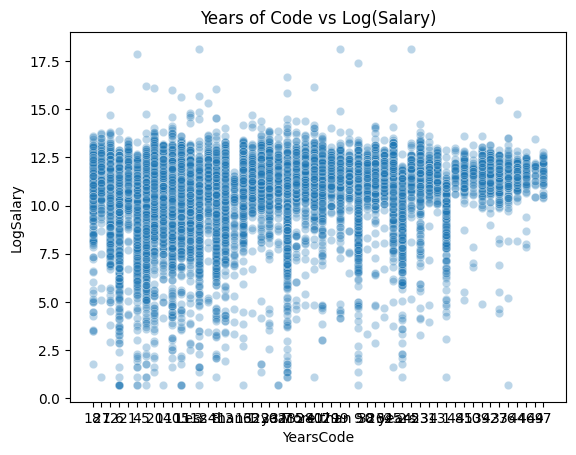

In [13]:
import numpy as np
df['LogSalary'] = np.log1p(df['ConvertedCompYearly'])

sns.scatterplot(x='YearsCode', y='LogSalary', data=df, alpha=0.3)
plt.title("Years of Code vs Log(Salary)")
plt.show()

##### The above code shows total distint survey answers that are in the different combination, each counts as an entry but now as a language. Python, Java and Java, Python are trated separately. Hence, after separation, only unique entries are being extracted. 

In [14]:
multi_label_cols = [
    'LanguageHaveWorkedWith',
    'TechList',
    'PlatformHaveWorkedWith',
    'WebframeHaveWorkedWith',
    'ToolsTechHaveWorkedWith',
    'ProfessionalTech'
]

# keep track of how many unique values we discover
multi_label_stats = {}

for col in multi_label_cols:
    if col in df.columns:
        dummies = df[col].str.get_dummies(sep=';')
        print(f"Parsed {col}: {dummies.shape[1]} unique values")
        multi_label_stats[col] = dummies.shape[1]
        
        # optionally join back to main df
        df = pd.concat([df, dummies], axis=1)
    else:
        print(f"Column {col} not found in dataset.")

Parsed LanguageHaveWorkedWith: 51 unique values
Parsed TechList: 3 unique values
Parsed PlatformHaveWorkedWith: 23 unique values
Parsed WebframeHaveWorkedWith: 34 unique values
Parsed ToolsTechHaveWorkedWith: 55 unique values
Parsed ProfessionalTech: 9 unique values


In [15]:
features_original = df[['YearsCode', 'YearsCodePro', 'WorkExp', 'ConvertedCompYearly', 'EdLevel', 'DevType', 'OrgSize', 'TechList', 'LanguageHaveWorkedWith', 
                'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 
                'ToolsTechHaveWorkedWith', 'Industry', 'ProfessionalTech', 'Country', 'Employment', 'Age']]

In [16]:
features = features_original.copy()

In [17]:
for col in ['Country', 'Employment', 'CompanySize', 'YearsCodePro', 'Age']:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

Country: 185 unique values
Employment: 106 unique values
YearsCodePro: 52 unique values
Age: 8 unique values


In [18]:
# Method 1: Using value_counts() - most common approach
top_5_values = features['YearsCodePro'].value_counts().head(5)
print(top_5_values)

# Method 2: If you just want the values (not counts)
top_5_values_only = features['YearsCodePro'].value_counts().head(5).index.tolist()
print(top_5_values_only)

# Method 3: Using mode() for the most frequent value only
most_frequent = features['YearsCodePro'].mode()[0]  # mode() returns a Series
print(f"Most frequent value: {most_frequent}")

YearsCodePro
5     4792
10    4594
2     4464
3     4378
4     3970
Name: count, dtype: int64
['5', '10', '2', '3', '4']
Most frequent value: 5


In [19]:
# Look for values containing specific words
text_mask = features['YearsCodePro'].str.contains('year|than|less|more', case=False, na=False)
text_values = features[text_mask]['YearsCodePro']
print(text_values.value_counts())

YearsCodePro
Less than 1 year      1836
More than 50 years      83
Name: count, dtype: int64


In [20]:
# Converting 'Less than 1 year' to 0. Making 'More than 50 years' with NaN and replacing it with median values in the imputer.

def convert_experience(value):
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).lower()

    if any(phrase in value_str for phrase in ['Less than', 'than 1', '<1', 'less than 1']):
        return 0
    else:
        return pd.to_numeric(value, errors='coerce')
    
features['YearsCodePro'] = features['YearsCodePro'].apply(convert_experience)

In [21]:
# Ref in Journal. 

# Inputing YearsCodePro to handle 20000+ missing values that are required to convert it to 'int' type for further analysis. 

from sklearn.impute import SimpleImputer

# Step 1: Convert to numeric, coercing errors to NaN
features['YearsCodePro'] = pd.to_numeric(features['YearsCodePro'], errors='coerce')

imputer = SimpleImputer(strategy='median')

features['YearsCodePro'] = imputer.fit_transform(features[['YearsCodePro']]).flatten()

features['YearsCodePro'] = features['YearsCodePro'].astype(int)

print("Final result:")
print("Data type:", features['YearsCodePro'].dtype)


Final result:
Data type: int64


In [22]:
features['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                  53748
Student, full-time                                                                                                                    7430
Independent contractor, freelancer, or self-employed                                                                                  7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                                              4354
Not employed, but looking for work                                                                                                    2553
                                                                                                                                     ...  
Independent contractor, freelancer, or self-employed;Student, full-time;Student, part-time;Not employed, and not looking for work        1
Employed, full-t

In [23]:
# Bucketizing 'Employment' to 5 total categories to reduce noise and easily measure effects/correlation of each category. There are a lot of ';' separated values that have to be taken care of.

# Step 1: Create a function to determine primary employment status
def categorize_employment(employment_str):
    if pd.isna(employment_str):
        return 'Unknown'
    
    employment_str = str(employment_str).lower()
    
    # Define priority order (most important status first)
    if 'employed, full-time' in employment_str:
        return 'Full-time Employed'
    elif 'student, full-time' in employment_str:
        return 'Student'
    elif 'independent contractor' in employment_str or 'freelancer' in employment_str or 'self-employed' in employment_str:
        return 'Freelancer/Self-employed'
    elif 'employed, part-time' in employment_str:
        return 'Part-time Employed'
    elif 'not employed, but looking' in employment_str:
        return 'Unemployed (Looking)'
    elif 'student, part-time' in employment_str:
        return 'Student'
    elif 'retired' in employment_str:
        return 'Other'
    elif 'not employed, and not looking' in employment_str:
        return 'Other'
    else:
        return 'Other'

# Step 2: Apply the categorization
features['Employment_Category'] = features['Employment'].apply(categorize_employment)

In [24]:
features = features.drop('Employment', axis=1)

In [25]:
has_semicolon = features['WebframeHaveWorkedWith'].str.contains(';', na=False)
print(f"Rows with semicolon-separated values: {has_semicolon.sum()}")

Rows with semicolon-separated values: 52575


In [26]:
# Split by semicolon and take the first value as primary webframe
features['WebframeHaveWorkedWith'] = features['WebframeHaveWorkedWith'].str.split(';').str[0]

In [27]:
has_semicolon_after = features['WebframeHaveWorkedWith'].str.contains(';', na=False)
print(f"Rows with semicolon=seprated values: {has_semicolon_after.sum()}")

Rows with semicolon=seprated values: 0


In [28]:
missing_count = features['WebframeHaveWorkedWith'].isna().sum()

if missing_count > 0:
    imputer = SimpleImputer(strategy='most_frequent')
    features['WebframeHaveWorkedWith'] = imputer.fit_transform(features[['WebframeHaveWorkedWith']]).flatten()

In [29]:
from sklearn.impute import SimpleImputer

imputer_most_freq = SimpleImputer(strategy='most_frequent')
features['PlatformHaveWorkedWith'] = imputer.fit_transform(features[['PlatformHaveWorkedWith']]).flatten()

In [30]:
features['PlatformHaveWorkedWith'].value_counts()

PlatformHaveWorkedWith
Amazon Web Services (AWS)                                                                35360
Microsoft Azure                                                                           5945
Google Cloud                                                                              2495
Amazon Web Services (AWS);Microsoft Azure                                                 2192
Amazon Web Services (AWS);Google Cloud                                                    1810
                                                                                         ...  
Amazon Web Services (AWS);Digital Ocean;Fly.io;Google Cloud;Linode, now Akamai;VMware        1
Google Cloud;IBM Cloud Or Watson;Vercel;VMware                                               1
Heroku;Linode, now Akamai;VMware                                                             1
Google Cloud;Hetzner;Vultr                                                                   1
Cloudflare;Google Cloud;Man

In [31]:
platforms_with_semicolon = features['PlatformHaveWorkedWith'].str.contains(';', na=False)

features['PlatformHaveWorkedWith'] = features['PlatformHaveWorkedWith'].str.split(';').str[0]

In [32]:
platforms_with_semicolon_after = features['PlatformHaveWorkedWith'].str.contains(';', na=False)
print(f"Rows with semicolons after processing: {platforms_with_semicolon_after.sum()}")

Rows with semicolons after processing: 0


In [33]:
# Total columns in Features: 

# Index(['YearsCode', 'YearsCodePro', 'WorkExp', 'ConvertedCompYearly',
  #     'EdLevel', 'DevType', 'OrgSize', 'TechList', 'LanguageHaveWorkedWith',
   #    'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
    #   'ToolsTechHaveWorkedWith', 'Industry', 'ProfessionalTech', 'Country',
     #  'Age', 'LogSalary', 'Employment_Category'],
      #dtype='object')

# Columns converted/taken care of: 'YearsCodePro', 'ConvertedCompyYearly' (now LogSalary), 'OrgSize', 'LanguageHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
# 'Country', 'EmploymentCategory'

# Remaining: 'WorkExp', 'EdLevel', 'DevType', 'TechList', 'ProfessionalTech'

In [34]:
def bucketize_education(edlevel):
    """
    Bucketize education levels into 5 meaningful categories
    """
    if pd.isna(edlevel):
        return 'No_Degree'
    
    edlevel = str(edlevel).lower()
    
    if any(x in edlevel for x in ['doctoral', 'phd', 'doctorate']):
        return 'PhD'
    elif any(x in edlevel for x in ['master', 'graduate']):
        return 'Masters' 
    elif any(x in edlevel for x in ['bachelor', 'undergraduate']):
        return 'Bachelors'
    elif any(x in edlevel for x in ['associate', 'some college']):
        return 'Associates'
    else:
        return 'No_Degree'

In [35]:
def bucketize_devtype(devtype):
    """
    Bucketize developer types prioritizing by typical salary impact
    """
    if pd.isna(devtype):
        return 'Other'
    
    # Handle semicolon-separated values - prioritize by salary impact
    devtype = str(devtype).lower()
    
    # Check for highest-paying roles first
    if any(x in devtype for x in ['data scientist', 'machine learning', 'data engineer']):
        return 'Data_Science'
    elif any(x in devtype for x in ['engineering manager', 'product manager', 'senior executive']):
        return 'Leadership'
    elif any(x in devtype for x in ['backend', 'full-stack', 'software engineer']):
        return 'Engineering'
    elif any(x in devtype for x in ['frontend', 'mobile', 'game']):
        return 'Frontend'
    else:
        return 'Other'

In [36]:
features['EdLevel'] = features['EdLevel'].apply(bucketize_education)

In [37]:
features['DevType'] = features['DevType'].apply(bucketize_devtype)

In [38]:
def bucketize_professional_tech_multiple(tech_string):
    """
    Applies hierarchical keyword-based bucketing to a semi-colon separated string of technologies.
    It iterates through each technology and assigns the first bucket that matches.
    """
    if pd.isna(tech_string):
        return 'None'
    
    lower_tech_string = str(tech_string).lower()

    if 'none of these' in lower_tech_string:
        return 'None'

    buckets = {
        # No change to these top categories
        'AI/ML': ['ai', 'machine learning', 'ml', 'deep learning', 'neural network', 'nlp', 'natural language', 'computer vision', 'tensorflow', 'pytorch', 'keras', 'scikit-learn', 'openai'],
        'Data Science & Analytics': ['data science', 'data analysis', 'analytics', 'big data', 'hadoop', 'spark', 'pandas', 'numpy', 'tableau', 'power bi', 'databricks', 'snowflake'],
        
        # ADD 'observability' to this bucket
        'DevOps & Cloud': ['devops', 'ci/cd', 'continuous integration', 'continuous delivery', 'docker', 'kubernetes', 'terraform', 'ansible', 'jenkins', 'aws', 'azure', 'gcp', 'cloud', 'observability'],
        
        # No change to these categories yet
        'Web Development': ['web', 'frontend', 'backend', 'full-stack', 'javascript', 'react', 'angular', 'vue', 'node.js', 'django', 'flask', 'ruby on rails', 'php', 'asp.net'],
        'Mobile Development': ['mobile', 'ios', 'android', 'swift', 'kotlin', 'react native', 'flutter', 'xamarin'],
        'Databases': ['database', 'sql', 'nosql', 'postgresql', 'mysql', 'sql server', 'mongodb', 'redis', 'cassandra', 'firebase'],
        'Testing & QA': ['testing', 'qa', 'quality assurance', 'selenium', 'jest', 'pytest', 'cypress', 'junit'],
        'Security': ['security', 'cybersecurity', 'infosec', 'penetration testing', 'pen testing'],
        'Developer Tools': ['git', 'github', 'gitlab', 'jira', 'visual studio code', 'ide'],
        
        # ✨ NEW BUCKET ✨
        'Architecture & Practices': ['microservices', 'developer portal', 'innersource']
    }

    listed_techs = [tech.strip().lower() for tech in str(tech_string).split(';')]

    for tech in listed_techs:
        for bucket, keywords in buckets.items():
            if any(keyword in tech for keyword in keywords):
                return bucket  # Return the first bucket that matches

    return 'Other'

In [39]:
features['ProfessionalTech'] = df['ProfessionalTech'].apply(bucketize_professional_tech_multiple)

In [40]:
features['ProfessionalTech'].value_counts()

ProfessionalTech
None                        52385
DevOps & Cloud              26803
Architecture & Practices     5578
Testing & QA                 4173
AI/ML                         245
Name: count, dtype: int64

In [41]:
features['ConvertedCompYearly'] = df['ConvertedCompYearly']
features.head(5)

,YearsCode,YearsCodePro,WorkExp,ConvertedCompYearly,EdLevel,DevType,OrgSize,TechList,LanguageHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,Industry,ProfessionalTech,Country,Age,Employment_Category
0,NaN,9,NaN,NaN,No_Degree,Other,NaN,NaN,NaN,Amazon Web Services (AWS),Angular,NaN,NaN,None,NaN,18-24 years old,Unknown
1,18,9,10.0,285000.0,Bachelors,Leadership,2 to 9 employees,Investigate,HTML/CSS;JavaScript;Python,Amazon Web Services (AWS),Next.js,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,"Information Services, IT, Software Development...",DevOps & Cloud,United States of America,25-34 years old,Full-time Employed
2,27,23,23.0,250000.0,Bachelors,Other,"5,000 to 9,999 employees",Given a list,Bash/Shell (all shells);Go,Amazon Web Services (AWS),Angular,Cargo;Docker;Kubernetes;Make;Nix,"Information Services, IT, Software Development...",DevOps & Cloud,United States of America,45-54 years old,Full-time Employed
3,12,7,7.0,156000.0,Bachelors,Other,100 to 499 employees,Investigate,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Cloudflare,Node.js,Homebrew;npm;Vite;Webpack;Yarn,NaN,Testing & QA,United States of America,25-34 years old,Full-time Employed
4,6,4,6.0,23456.0,Bachelors,Engineering,20 to 99 employees,Investigate,HTML/CSS;JavaScript;TypeScript,Amazon Web Services (AWS),Express,Docker;npm;Webpack;Yarn,Other,Architecture & Practices,Philippines,25-34 years old,Full-time Employed


In [42]:
# Progress: 

# Index(['YearsCode', 'YearsCodePro', 'WorkExp', 'ConvertedCompYearly',
  #     'EdLevel', 'DevType', 'OrgSize', 'TechList', 'LanguageHaveWorkedWith',
   #    'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
    #   'ToolsTechHaveWorkedWith', 'Industry', 'ProfessionalTech', 'Country',
     #  'Age', 'LogSalary', 'Employment_Category'],
      #dtype='object')

# Columns converted/taken care of: 'YearsCodePro', 'ConvertedCompyYearly' (now LogSalary), 'OrgSize', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
# 'Country', 'EmploymentCategory', 'WorkExp', 'EdLevel', 'DevType', 'TechList', 'ProfessionalTech' 

# Remaining: 'LanguageHaveWorkedWith', 'WorkExp', 'Industry'

In [43]:
from sklearn.impute import SimpleImputer

salary_imputer = SimpleImputer(strategy='Median')

salary_column = features['ConvertedCompYearly'].values.reshape(-1, 1)

imputed_salary = imputer.fit_transform(salary_column)

In [44]:
features['ConvertedCompYearly'] = imputed_salary

In [45]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearsCode                87435 non-null  object 
 1   YearsCodePro             89184 non-null  int64  
 2   WorkExp                  43579 non-null  float64
 3   ConvertedCompYearly      89184 non-null  float64
 4   EdLevel                  89184 non-null  object 
 5   DevType                  89184 non-null  object 
 6   OrgSize                  65043 non-null  object 
 7   TechList                 60851 non-null  object 
 8   LanguageHaveWorkedWith   87140 non-null  object 
 9   PlatformHaveWorkedWith   89184 non-null  object 
 10  WebframeHaveWorkedWith   89184 non-null  object 
 11  ToolsTechHaveWorkedWith  77884 non-null  object 
 12  Industry                 36774 non-null  object 
 13  ProfessionalTech         89184 non-null  object 
 14  Country               

In [46]:
tools_csv = features['ToolsTechHaveWorkedWith'].to_csv('tools.csv', index=False)

In [47]:
languages_csv = features['LanguageHaveWorkedWith'].to_csv('languages.csv', index=False)

In [48]:
from sklearn.impute import SimpleImputer

# Defining a function (mini-pipeline) to Standardize > Bucketize > Normalize columns. 

def process_categorical_column(df, column_name, bucket_dict):
    """
    Applies bucketing and imputation to a specified column.
    """
    print(f"Processing column: {column_name}...")

    # 1. Define the inner bucketing function

    def apply_priority_bucketing(raw_string):
        if pd.isna(raw_string):
            return np.nan

        # We now work with the entire lowercase string
        raw_string_lower = str(raw_string).lower()

        # Iterate through the bucket dictionary (now a priority list)
        for bucket, keywords in bucket_dict.items():
            # Check if any keyword for the current priority bucket exists
            if any(keyword in raw_string_lower for keyword in keywords):
                return bucket # Return the first priority bucket that matches
        
        return 'Other' # If no keywords from any bucket are found

    # 2. Apply the bucketing logic
    new_col_name = f"{column_name}_Bucket"
    features[new_col_name] = features[column_name].apply(apply_priority_bucketing)

    # 3. Impute missing values with the most frequent category
    imputer = SimpleImputer(strategy='most_frequent')
    imputed_data = imputer.fit_transform(features[[new_col_name]])
    features[new_col_name] = imputed_data.ravel()

    print(f"Finished processing. New column '{new_col_name}' created and imputed.")
    print(features[new_col_name].value_counts())
    print("-" * 50) # Separator for clarity
    
    return df

In [49]:
languages_buckets = {
    'Solidity': ['solidity'],
    'Rust': ['rust'],
    'Go (Golang)': ['go', 'golang'],
    'Scala': ['scala'],
    'Ruby': ['ruby'],
    'C++': ['c++'],
    'Python': ['python'],
    'Swift': ['swift'],
    'Kotlin': ['kotlin'],
    'SQL': ['sql'],
    'TypeScript': ['typescript'],
    'C#': ['c#'],
    'Java': ['java'],
    'R': ['r'],
    'PHP': ['php']
}

In [50]:
features = process_categorical_column(features, 'LanguageHaveWorkedWith', languages_buckets)

Processing column: LanguageHaveWorkedWith...
Finished processing. New column 'LanguageHaveWorkedWith_Bucket' created and imputed.
LanguageHaveWorkedWith_Bucket
Python         21986
SQL            12615
C++            12607
Rust           11102
Go (Golang)     8070
TypeScript      5713
Java            3914
Ruby            3455
C#              1938
Kotlin          1862
Scala           1522
Swift           1302
Solidity        1168
Other           1041
R                666
PHP              223
Name: count, dtype: int64
--------------------------------------------------


In [51]:
tools_platforms_buckets = {
    # --- Top Priority Buckets ---
    'Kubernetes': ['kubernetes', 'k8s'],
    'Docker': ['docker'],
    'Cloud Platforms': ['aws', 'azure', 'gcp', 'google cloud', 'amazon web services'],
    'Terraform': ['terraform'],
    'Ansible': ['ansible'],
    'Apache Spark': ['spark', 'apache spark'],
    'Apache Kafka': ['kafka', 'apache kafka'],
    'AI/ML Libraries': ['tensorflow', 'pytorch', 'keras', 'scikit-learn'],
    'Snowflake': ['snowflake'],
    'PostgreSQL': ['postgresql', 'postgres'],
    'MongoDB': ['mongodb', 'mongo'],
    'Redis': ['redis'],
    'CI/CD Tools': ['jenkins', 'gitlab ci', 'ci/cd'],
    
    # --- ✨ NEW BUCKETS ✨ ---
    'Game Engines': ['unity 3d', 'unreal engine'],
    'Package Managers': ['npm', 'pip', 'maven', 'gradle', 'nuget', 'yarn', 'homebrew', 'cargo'],
    'Build Tools': ['webpack', 'msbuild', 'vite', 'make', 'gcc'],
    
    # --- General Developer Tools ---
    'Developer Tools': ['git', 'jira', 'visual studio solution'] # Added VS Solution
}

In [52]:
features = process_categorical_column(features, 'ToolsTechHaveWorkedWith', tools_platforms_buckets)

Processing column: ToolsTechHaveWorkedWith...
Finished processing. New column 'ToolsTechHaveWorkedWith_Bucket' created and imputed.
ToolsTechHaveWorkedWith_Bucket
Docker              39380
Package Managers    23351
Kubernetes          15260
Build Tools          3588
Game Engines         3396
Developer Tools      1380
Ansible               964
Other                 945
Terraform             920
Name: count, dtype: int64
--------------------------------------------------


In [53]:
# Progress: 

# Index(['YearsCode', 'YearsCodePro', 'WorkExp', 'ConvertedCompYearly',
  #     'EdLevel', 'DevType', 'OrgSize', 'TechList', 'LanguageHaveWorkedWith',
   #    'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
    #   'ToolsTechHaveWorkedWith', 'Industry', 'ProfessionalTech', 'Country',
     #  'Age', 'LogSalary', 'Employment_Category'],
      #dtype='object')

# Columns converted/taken care of: 'YearsCodePro', 'ConvertedCompyYearly', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
# 'EmploymentCategory', 'WorkExp', 'EdLevel', 'DevType', 'ProfessionalTech', 'LanguageHaveWorkedWith'. 

# Remaining: 'Country', 'Industry', 'Age', 'OrgSize', 'Country'

In [54]:
features = features.rename(columns={'ProfessionalTech': 'ProfessionalTech_Bucket', 'EdLevel':'EdLevel_Bucket', 'Employment_Category':'Employment_Category_Bucket', 'WorkExp':'WorkExp_Bucket'})

In [55]:
features = features.drop('YearsCode', axis=1)

In [56]:
features = features.drop('LanguageHaveWorkedWith', axis=1)

In [57]:
features.drop(['WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith'], axis=1)

,YearsCodePro,WorkExp_Bucket,ConvertedCompYearly,EdLevel_Bucket,DevType,OrgSize,TechList,PlatformHaveWorkedWith,Industry,ProfessionalTech_Bucket,Country,Age,Employment_Category_Bucket,LanguageHaveWorkedWith_Bucket,ToolsTechHaveWorkedWith_Bucket
0,9,NaN,64254.0,No_Degree,Other,NaN,NaN,Amazon Web Services (AWS),NaN,None,NaN,18-24 years old,Unknown,Python,Docker
1,9,10.0,285000.0,Bachelors,Leadership,2 to 9 employees,Investigate,Amazon Web Services (AWS),"Information Services, IT, Software Development...",DevOps & Cloud,United States of America,25-34 years old,Full-time Employed,Python,Kubernetes
2,23,23.0,250000.0,Bachelors,Other,"5,000 to 9,999 employees",Given a list,Amazon Web Services (AWS),"Information Services, IT, Software Development...",DevOps & Cloud,United States of America,45-54 years old,Full-time Employed,Go (Golang),Kubernetes
3,7,7.0,156000.0,Bachelors,Other,100 to 499 employees,Investigate,Cloudflare,NaN,Testing & QA,United States of America,25-34 years old,Full-time Employed,Ruby,Package Managers
4,4,6.0,23456.0,Bachelors,Engineering,20 to 99 employees,Investigate,Amazon Web Services (AWS),Other,Architecture & Practices,Philippines,25-34 years old,Full-time Employed,TypeScript,Docker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,5,NaN,64254.0,Associates,Other,100 to 499 employees,Investigate,Digital Ocean,NaN,None,Brazil,25-34 years old,Full-time Employed,SQL,Docker
89180,9,NaN,64254.0,Bachelors,Other,NaN,Investigate,Amazon Web Services (AWS),NaN,None,Romania,18-24 years old,Student,Python,Package Managers
89181,9,NaN,64254.0,No_Degree,Other,NaN,NaN,Amazon Web Services (AWS),NaN,None,Israel,Prefer not to say,Other,Rust,Package Managers
89182,9,NaN,64254.0,No_Degree,Other,NaN,Investigate,Amazon Web Services (AWS),NaN,None,Switzerland,Under 18 years old,Part-time Employed,Solidity,Kubernetes


In [58]:
features.columns
features.drop(['TechList', 'ToolsTechHaveWorkedWith'], axis=1, inplace=True)

In [59]:
features = features.rename(columns={'PlatformHaveWorkedWith':'PlatformHaveWorkedWith_Bucket', 'WebframeHaveWorkedWith':'WebframeHaveWorkedWith_Bucket'})

In [60]:
features = features.rename(columns={'DevType':'DevType_Bucket', 'Industry':'Industry_Bucket', 'Age':'Age_Bucket', 'YearsCodePro':'YearsCodePro_B'})

In [61]:
features.head(2)

,YearsCodePro_B,WorkExp_Bucket,ConvertedCompYearly,EdLevel_Bucket,DevType_Bucket,OrgSize,PlatformHaveWorkedWith_Bucket,WebframeHaveWorkedWith_Bucket,Industry_Bucket,ProfessionalTech_Bucket,Country,Age_Bucket,Employment_Category_Bucket,LanguageHaveWorkedWith_Bucket,ToolsTechHaveWorkedWith_Bucket
0,9,NaN,64254.0,No_Degree,Other,NaN,Amazon Web Services (AWS),Angular,NaN,None,NaN,18-24 years old,Unknown,Python,Docker
1,9,10.0,285000.0,Bachelors,Leadership,2 to 9 employees,Amazon Web Services (AWS),Next.js,"Information Services, IT, Software Development...",DevOps & Cloud,United States of America,25-34 years old,Full-time Employed,Python,Kubernetes


In [62]:
from sklearn.impute import SimpleImputer


top_10_countries = features['Country'].value_counts().nlargest(10).index

# .where() keeps the value if the condition is true, otherwise replaces it with 'Other'
features['Country_Grouped'] = features['Country'].where(features['Country'].isin(top_10_countries), 'Other')

imputer = SimpleImputer(strategy='most_frequent')
features['Country_Grouped'] = imputer.fit_transform(features[['Country_Grouped']]).ravel()


print(features['Country_Grouped'].value_counts())

Country_Grouped
Other                                                   36654
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Name: count, dtype: int64


In [63]:
# Fill missing values with a distinct category
features['OrgSize'].fillna('Not Specified', inplace=True)

print("\nOrgSize distribution after filling NaNs:")
print(features['OrgSize'].value_counts())


OrgSize distribution after filling NaNs:
OrgSize
Not Specified                                         24141
20 to 99 employees                                    13380
100 to 499 employees                                  12218
10,000 or more employees                               7929
1,000 to 4,999 employees                               7235
2 to 9 employees                                       6439
10 to 19 employees                                     5254
500 to 999 employees                                   4472
Just me - I am a freelancer, sole proprietor, etc.     4196
5,000 to 9,999 employees                               2677
I don’t know                                           1243
Name: count, dtype: int64


C:\Users\Muhammad Hassan\AppData\Local\Temp\ipykernel_17012\2987087267.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['OrgSize'].fillna('Not Specified', inplace=True)


In [64]:
# 1. Define the explicit order of the organization sizes
org_size_order = [
    'Just me - I am a freelancer, sole proprietor, etc.',
    '2 to 9 employees',
    '10 to 19 employees',
    '20 to 99 employees',
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees',
    'I don’t know',
    'Not Specified'
]

# 2. Create the ordinally encoded column
features['OrgSize_Encoded'] = pd.Categorical(
    features['OrgSize'],
    categories=org_size_order,
    ordered=True
).codes # .cat.codes returns the numerical representation

print("\nOrgSize categories and their new encoded values:")
print(features[['OrgSize', 'OrgSize_Encoded']].drop_duplicates().sort_values('OrgSize_Encoded'))


OrgSize categories and their new encoded values:
                                              OrgSize  OrgSize_Encoded
18  Just me - I am a freelancer, sole proprietor, ...                0
1                                    2 to 9 employees                1
7                                  10 to 19 employees                2
4                                  20 to 99 employees                3
3                                100 to 499 employees                4
17                               500 to 999 employees                5
6                            1,000 to 4,999 employees                6
2                            5,000 to 9,999 employees                7
13                           10,000 or more employees                8
54                                       I don’t know                9
0                                       Not Specified               10


In [65]:
# 1. Impute missing values first
imputer = SimpleImputer(strategy='most_frequent')
features['Age_Bucket'] = imputer.fit_transform(features[['Age_Bucket']]).ravel()

# 2. Define the explicit order of the age groups
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# 3. Create the ordinally encoded column using pandas' Categorical type
features['Age_Encoded'] = pd.Categorical(
    features['Age_Bucket'],
    categories=age_order,
    ordered=True
).codes # .cat.codes returns the numerical representation

print("\nAge categories and their new encoded values:")
print(features[['Age_Bucket', 'Age_Encoded']].drop_duplicates().sort_values('Age_Encoded'))


Age categories and their new encoded values:
             Age_Bucket  Age_Encoded
245   Prefer not to say           -1
18   Under 18 years old            0
0       18-24 years old            1
1       25-34 years old            2
5       35-44 years old            3
2       45-54 years old            4
36      55-64 years old            5
103   65 years or older            6


In [66]:
features.head(2)

,YearsCodePro_B,WorkExp_Bucket,ConvertedCompYearly,EdLevel_Bucket,DevType_Bucket,OrgSize,PlatformHaveWorkedWith_Bucket,WebframeHaveWorkedWith_Bucket,Industry_Bucket,ProfessionalTech_Bucket,Country,Age_Bucket,Employment_Category_Bucket,LanguageHaveWorkedWith_Bucket,ToolsTechHaveWorkedWith_Bucket,Country_Grouped,OrgSize_Encoded,Age_Encoded
0,9,NaN,64254.0,No_Degree,Other,Not Specified,Amazon Web Services (AWS),Angular,NaN,None,NaN,18-24 years old,Unknown,Python,Docker,Other,10,1
1,9,10.0,285000.0,Bachelors,Leadership,2 to 9 employees,Amazon Web Services (AWS),Next.js,"Information Services, IT, Software Development...",DevOps & Cloud,United States of America,25-34 years old,Full-time Employed,Python,Kubernetes,United States of America,1,2


In [67]:
features.drop('WorkExp_Bucket', axis=1, inplace=True)

In [68]:
features.drop('Industry_Bucket', axis=1, inplace=True)

In [69]:
features.drop('Country', axis=1, inplace=True)

In [70]:
features.drop(['Age_Bucket', 'OrgSize'], axis=1, inplace=True)

In [71]:
salary = features.copy()

In [72]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   YearsCodePro_B                  89184 non-null  int64  
 1   ConvertedCompYearly             89184 non-null  float64
 2   EdLevel_Bucket                  89184 non-null  object 
 3   DevType_Bucket                  89184 non-null  object 
 4   PlatformHaveWorkedWith_Bucket   89184 non-null  object 
 5   WebframeHaveWorkedWith_Bucket   89184 non-null  object 
 6   ProfessionalTech_Bucket         89184 non-null  object 
 7   Employment_Category_Bucket      89184 non-null  object 
 8   LanguageHaveWorkedWith_Bucket   89184 non-null  object 
 9   ToolsTechHaveWorkedWith_Bucket  89184 non-null  object 
 10  Country_Grouped                 89184 non-null  object 
 11  OrgSize_Encoded                 89184 non-null  int8   
 12  Age_Encoded                     

---


#### ___FIT ON TRAIN, TRANSFORM ON TEST!___

In [73]:
salary['salary_cat'] = pd.cut(salary['ConvertedCompYearly'],
                              bins=[0., 30000., 60000., 90000., 120000., np.inf],
                              labels=[1, 2, 3, 4, 5])

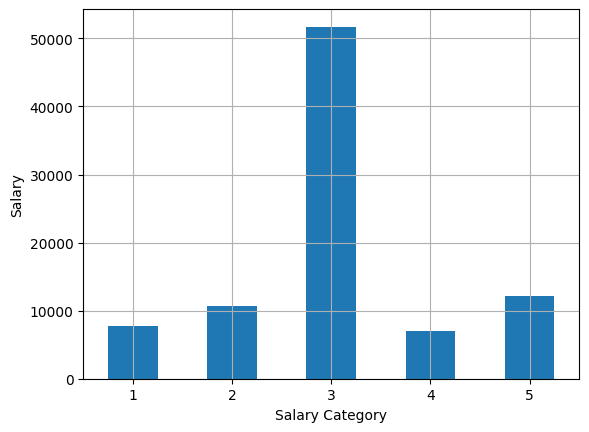

In [74]:
salary["salary_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Salary Category")
plt.ylabel("Salary")
plt.show()

In [75]:
X = salary.drop('ConvertedCompYearly', axis=1)
y = salary['ConvertedCompYearly']

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

#### ___MAIN PIPELINE & CUSTOM TARGET ENCODER___

In [77]:
# Custom Transformer for Highly Sensitive Traget Encoding 

from sklearn.base import BaseEstimator, TransformerMixin

class CustomTargetEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass

    def fit(self, X, y=None):

        if y is None:
            raise ValueError("Target encoder requires y during fit")

        if not isinstance(y, pd.Series):
            y = pd.Series(y, name="target")
        else:   
            y = y.copy()

        self.global_mean_ = y.mean()
        
        self.encodings_ = {}
        
        for col in X.columns:
            salary = pd.concat([X[[col]], y], axis=1)
            self.encodings_[col] = salary.groupby(col)[y.name].mean()
            
        return self

    def transform(self, X):
        
        X_new = X.copy()
        for col in X.columns:
            X_new[col] = X_new[col].map(self.encodings_[col]).fillna(self.global_mean_)
        return X_new
    
    def get_feature_names_out(self, input_features=None):

        if input_features is None:
            return self.feature_names_in_
        return input_features


In [78]:
# MAIN PIPELINE with ColumnTransformer to perform Ordinal & OneHot Encoding. For transforming target-sensitive variables, the Custom TargetEncoder will be used. 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

ordinal_cols = ['EdLevel_Bucket']

onehot_cols = ['Country_Grouped', 'Employment_Category_Bucket']

target_cols = ['DevType_Bucket', 'PlatformHaveWorkedWith_Bucket', 'WebframeHaveWorkedWith_Bucket', 'ProfessionalTech_Bucket', 'LanguageHaveWorkedWith_Bucket', 'ToolsTechHaveWorkedWith_Bucket']

numerical_cols = ['YearsCodePro_B', 'OrgSize_Encoded', 'Age_Encoded']

edlevel_order = ['Masters', 'Bachelors', 'No_Degree', 'Associates']

all_ordinal_orders = [edlevel_order]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('ordinal', OrdinalEncoder(categories=all_ordinal_orders), ordinal_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True), onehot_cols),
        ('target', CustomTargetEncoder(), target_cols)
    ],
    remainder='passthrough'
)

robust_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

---

In [79]:
robust_pipeline.fit(X_train, y_train)
X_train_processed = robust_pipeline.transform(X_train)
X_test_processed = robust_pipeline.transform(X_test)

In [80]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Transform target to log scale
y_train_scaled = np.log1p(y_train)  # log1p = log(1 + x), handles zeros safely
y_test_scaled = np.log1p(y_test)

# Train model on log-scaled target
model = LinearRegression()
model.fit(X_train_processed, y_train_scaled)

# Make predictions (these will be in log scale)
y_pred_scaled = model.predict(X_test_processed)

# Transform predictions back to original salary scale
y_pred = np.expm1(y_pred_scaled)  # expm1 = exp(x) - 1, inverse of log1p

# Calculate RMSE on original scale
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: ${rmse:,.2f}")

RMSE: $432,861.96


In [81]:
# Check your data ranges
print(f"Actual salary range: ${y_test.min():,.0f} to ${y_test.max():,.0f}")
print(f"Predicted salary range: ${y_pred.min():,.0f} to ${y_pred.max():,.0f}")
print(f"Mean actual salary: ${y_test.mean():,.0f}")
print(f"Mean predicted salary: ${y_pred.mean():,.0f}")

Actual salary range: $1 to $57,513,831
Predicted salary range: $12,908 to $286,949
Mean actual salary: $84,146
Mean predicted salary: $80,221


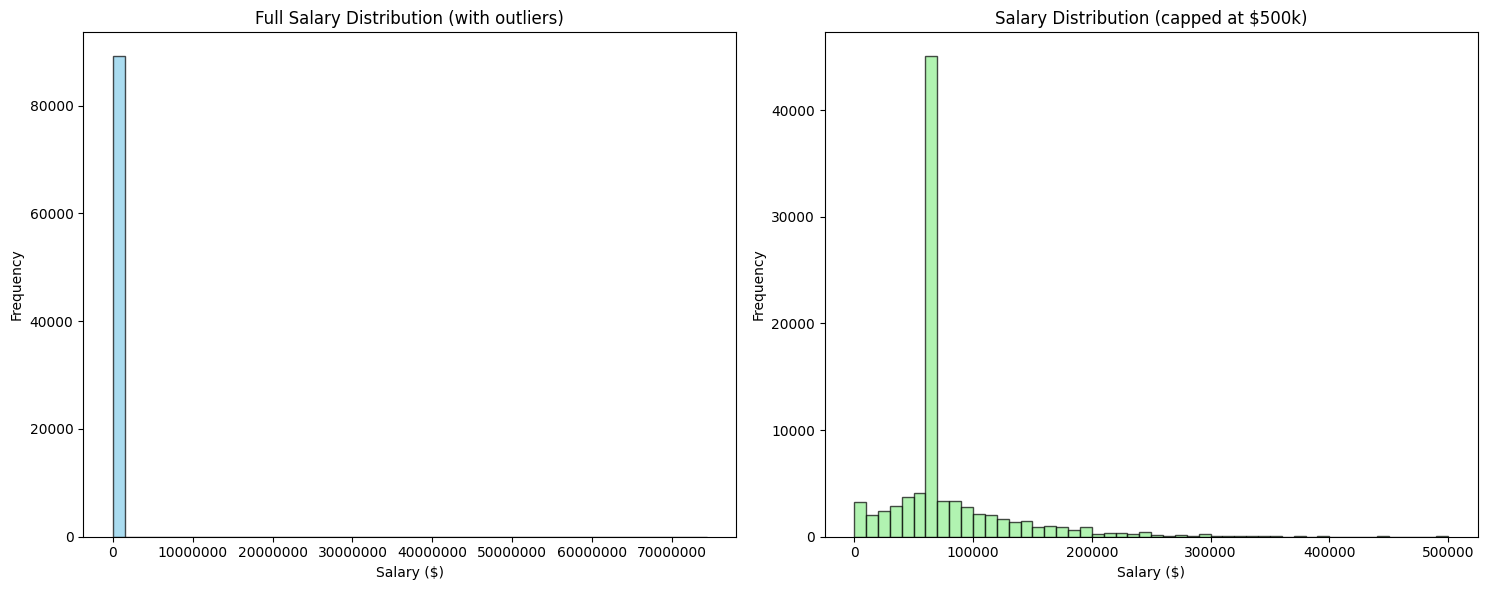

Top 10 highest salaries:
53268    74351432.0
77848    73607918.0
66223    72714292.0
28121    57513831.0
19679    36573181.0
55102    17612921.0
80586    11000000.0
83679    10319366.0
47797     9915585.0
88347     9203683.0
Name: ConvertedCompYearly, dtype: float64


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots to see both scales
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Full distribution (will show the extreme outliers)
axes[0].hist(y, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Full Salary Distribution (with outliers)')
axes[0].set_xlabel('Salary ($)')
axes[0].set_ylabel('Frequency')
axes[0].ticklabel_format(style='plain', axis='x')

# Plot 2: Zoomed in (cap at reasonable salary range)
reasonable_salaries = y[y <= 500000]
axes[1].hist(reasonable_salaries, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('Salary Distribution (capped at $500k)')
axes[1].set_xlabel('Salary ($)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Show the extreme outliers
print("Top 10 highest salaries:")
print(y.sort_values(ascending=False).head(10))

#### ___DATA QUALITY ISSUE! ^___

In [83]:
# Redoing the split after filtering the extreme values and capping max salary at $500k. 

In [ ]:
df_clean = salary[(salary['ConvertedCompYearly'] >= 100000) & (salary['ConvertedCompYearly'] <= 500000)]

X = df_clean.drop('ConvertedCompYearly', axis=1)
y= df_clean['ConvertedCompYearly']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
robust_pipeline.fit(X_train, y_train)
X_train_processed = robust_pipeline.transform(X_train)
X_test_processed = robust_pipeline.transform(X_test)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y_train_scaled = np.log1p(y_train)
model = LinearRegression()
model.fit(X_train_processed, y_train_scaled)

y_pred_scaled = model.predict(X_test_processed)
y_pred = np.expm1(y_pred_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: ${rmse:,.2f}")

RMSE: $54,857.90


#### __Huge improvement! RMSE improved from  $432k to $54k! 87%!__ 

The RMSE is still $55,000 points away.

Running Decision Tree & Random Forests now to improve accuracy.

In [87]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_processed, y_train_scaled)

y_pred_rf_scaled = rf.predict(X_test_processed)
y_pred_rf = np.expm1(y_pred_rf_scaled)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest RMSE: ${rmse_rf:,.2f}")
print(f"Linear Regression RMSE: ${rmse:,.2f}")

Random Forest RMSE: $54,477.69
Linear Regression RMSE: $54,857.90


In [88]:
# Trying with more trees and different depth

rf_tuned = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_tuned.fit(X_train_processed, y_train_scaled)
y_pred_tuned = np.expm1(rf_tuned.predict(X_test_processed))
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"Tuned Random Forest RMSE: ${rmse_tuned:,.2f}")

Tuned Random Forest RMSE: $54,259.29


### ___THE CELL BELOW WILL TAKE 100% CPU USAGE___

In [89]:
# Try with more trees first
rf_tuned = RandomForestRegressor DONT RUN THIS CODE(n_estimators=200, max_depth=20, random_state=42)
rf_tuned.fit(X_train_processed, y_train_scaled)
y_pred_tuned = np.expm1(rf_tuned.predict(X_test_processed))
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"Tuned Random Forest RMSE: ${rmse_tuned:,.2f}")

# GridSearchCV
from sklearn.model_selection import GridSearchCVsd

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42), 
    param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all cores
)

print("Running GridSearchCV...")
grid_search.fit(X_train_processed, y_train_scaled)

# Best model results
best_rf = grid_search.best_estimator_
y_pred_best = np.expm1(best_rf.predict(X_test_processed))
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"Best Random Forest RMSE: ${rmse_best:,.2f}")
print(f"Best parameters: {grid_search.best_params_}")

SyntaxError: invalid syntax (2367989624.py, line 2)

#### ___Running the models again on Stratified Split___

In [90]:
y_cleaned = df_clean['ConvertedCompYearly']

In [91]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

# Create salary bins for stratification
def create_salary_bins(y, n_bins=5):
    """Create salary bins for stratified splitting"""
    return pd.cut(y, bins=n_bins, labels=['Low', 'Low-Mid', 'Mid', 'Mid-High', 'High'])

# Apply stratified split
salary_bins = create_salary_bins(y_cleaned)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in stratified_split.split(X, salary_bins):
    X_train_strat, X_test_strat = X.iloc[train_idx], X.iloc[test_idx]
    y_train_strat, y_test_strat = y_cleaned.iloc[train_idx], y_cleaned.iloc[test_idx]

# Verify stratification worked
print("Original distribution:")
print(salary_bins.value_counts(normalize=True))
print("\nTrain distribution:")
print(create_salary_bins(y_train_strat).value_counts(normalize=True))
print("\nTest distribution:")
print(create_salary_bins(y_test_strat).value_counts(normalize=True))

Original distribution:
ConvertedCompYearly
Low         0.725207
Low-Mid     0.197193
Mid         0.045455
Mid-High    0.021087
High        0.011060
Name: proportion, dtype: float64

Train distribution:
ConvertedCompYearly
Low         0.725235
Low-Mid     0.197204
Mid         0.045427
Mid-High    0.021042
High        0.011091
Name: proportion, dtype: float64

Test distribution:
ConvertedCompYearly
Low         0.725091
Low-Mid     0.197145
Mid         0.045565
Mid-High    0.021264
High        0.010936
Name: proportion, dtype: float64


In [92]:
y_train_strat_log = np.log(y_train_strat).ravel()
y_test_strat_log = np.log(y_test_strat)

C:\Users\Muhammad Hassan\AppData\Local\Temp\ipykernel_17012\2094877144.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train_strat_log = np.log(y_train_strat).ravel()


In [93]:
robust_pipeline.fit(X_train_strat, y_train_strat_log)
X_train_strat_processed = robust_pipeline.transform(X_train_strat)
X_test_strat_processed = robust_pipeline.transform(X_test_strat)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_strat_processed, y_train_strat_log)

y_pred_scaled = model.predict(X_test_processed)
y_pred = np.expm1(y_pred_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: ${rmse:,.2f}")

RMSE: $54,857.90


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_strat_processed, y_train_strat_log)

y_strat_pred_rf = rf.predict(X_test_strat_processed)
y_strat_pred = np.expm1(y_strat_pred_rf)
rmse_strat_rf = np.sqrt(mean_squared_error(y_test_strat_log, y_strat_pred_rf))

print(f"Random Forest RMSE: ${rmse_strat_rf:,.2f}")
print(f"Linear Regression RMSE: ${rmse:,.2f}")

Random Forest RMSE: $0.24
Linear Regression RMSE: $54,857.90


In [ ]:
# Running with feature randomness parameters

rf = RandomForestRegressor(max_features='sqrt', random_state=42)
rf.fit(X_train_strat_processed, y_train_strat_log)

y_strat_pred_rf = rf.predict(X_test_strat_processed)
y_strat_pred = np.expm1(y_strat_pred_rf)
rmse_strat_rf = np.sqrt(mean_squared_error(y_test_strat_log, y_strat_pred_rf))

print(f"Random Forest RMSE: ${rmse_strat_rf:,.2f}")
print(f"Linear Regression RMSE: ${rmse:,.2f}")

Random Forest RMSE: $0.24
Linear Regression RMSE: $54,857.90


In [ ]:
# Running with more trees

rf_300 = RandomForestRegressor(n_estimators=300, random_state=42) 
rf_300.fit(X_train_strat_processed, y_train_strat_log)

y_strat_pred_rf = rf.predict(X_test_strat_processed)
y_strat_pred = np.expm1(y_strat_pred_rf)
rmse_strat_rf = np.sqrt(mean_squared_error(y_test_strat_log, y_strat_pred_rf))

print(f"Random Forest RMSE: ${rmse_strat_rf:,.2f}")
print(f"Linear Regression RMSE: ${rmse:,.2f}")

Random Forest RMSE: $0.24
Linear Regression RMSE: $54,857.90


In [ ]:
# Start fresh with clear variable names
rf_300 = RandomForestRegressor(n_estimators=300, random_state=42)
rf_300.fit(X_train_strat_processed, y_train_strat_log)

# Make fresh predictions
y_pred_rf_300 = rf_300.predict(X_test_strat_processed)

# Check prediction ranges (should be reasonable)
print(f"Prediction range: {y_pred_rf_300.min():.2f} to {y_pred_rf_300.max():.2f}")
print(f"Test target range: {y_test_strat_log.min():.2f} to {y_test_strat_log.max():.2f}")

# Calculate RMSE
rmse_rf_300 = np.sqrt(mean_squared_error(y_test_strat_log, y_pred_rf_300))
print(f"Random Forest RMSE: ${rmse_rf_300:,.2f}")

In [ ]:
# Convert predictions back to original scale
y_pred_rf_300_original = np.expm1(y_pred_rf_300)
y_test_original = np.expm1(y_test_strat_log)

# Calculate RMSE in original dollar scale
rmse_rf_300_dollars = np.sqrt(mean_squared_error(y_test_original, y_pred_rf_300_original))
print(f"Random Forest RMSE (dollars): ${rmse_rf_300_dollars:,.2f}")

# For comparison, show the ranges in dollars too
print(f"Prediction range (dollars): ${y_pred_rf_300_original.min():,.2f} to ${y_pred_rf_300_original.max():,.2f}")
print(f"Test target range (dollars): ${y_test_original.min():,.2f} to ${y_test_original.max():,.2f}")

Random Forest RMSE (dollars): $53,978.75
Prediction range (dollars): $102,371.10 to $326,959.59
Test target range (dollars): $99,999.00 to $499,999.00


In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCVsfdsd

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42), 
    param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

print("Running GridSearchCV...")
grid_search.fit(X_train_processed, y_train_scaled)

# Best model results
best_rf = grid_search.best_estimator_
y_pred_best = np.expm1(best_rf.predict(X_test_processed))
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"Best Random Forest RMSE: ${rmse_best:,.2f}")
print(f"Best parameters: {grid_search.best_params_}")

#### ___Feature Engineering___

In [95]:
features_with_yearscode = salary.copy()

In [96]:
features_with_yearscode['YearsCode'] = df['YearsCode']

In [106]:
y_cleaned = salary['ConvertedCompYearly']
y_cleaned.info()

<class 'pandas.core.series.Series'>
RangeIndex: 89184 entries, 0 to 89183
Series name: ConvertedCompYearly
Non-Null Count  Dtype  
--------------  -----  
89184 non-null  float64
dtypes: float64(1)
memory usage: 696.9 KB


In [152]:
features_with_yearscode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   YearsCodePro_B                  89184 non-null  int64   
 1   ConvertedCompYearly             89184 non-null  float64 
 2   EdLevel_Bucket                  89184 non-null  object  
 3   DevType_Bucket                  89184 non-null  object  
 4   PlatformHaveWorkedWith_Bucket   89184 non-null  object  
 5   WebframeHaveWorkedWith_Bucket   89184 non-null  object  
 6   ProfessionalTech_Bucket         89184 non-null  object  
 7   Employment_Category_Bucket      89184 non-null  object  
 8   LanguageHaveWorkedWith_Bucket   89184 non-null  object  
 9   ToolsTechHaveWorkedWith_Bucket  89184 non-null  object  
 10  Country_Grouped                 89184 non-null  object  
 11  OrgSize_Encoded                 89184 non-null  int8    
 12  Age_Encoded       

In [175]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

features_with_yearscode['YearsCode'] = imputer.fit_transform(features_with_yearscode[['YearsCode']]).flatten()

In [176]:
features_with_yearscode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   YearsCodePro_B                  89184 non-null  int64   
 1   ConvertedCompYearly             89184 non-null  float64 
 2   EdLevel_Bucket                  89184 non-null  object  
 3   DevType_Bucket                  89184 non-null  object  
 4   PlatformHaveWorkedWith_Bucket   89184 non-null  object  
 5   WebframeHaveWorkedWith_Bucket   89184 non-null  object  
 6   ProfessionalTech_Bucket         89184 non-null  object  
 7   Employment_Category_Bucket      89184 non-null  object  
 8   LanguageHaveWorkedWith_Bucket   89184 non-null  object  
 9   ToolsTechHaveWorkedWith_Bucket  89184 non-null  object  
 10  Country_Grouped                 89184 non-null  object  
 11  OrgSize_Encoded                 89184 non-null  int8    
 12  Age_Encoded       

In [314]:
df_clean = features_with_yearscode[(features_with_yearscode['ConvertedCompYearly'] >= 100000) & (features_with_yearscode['ConvertedCompYearly'] <= 500000)]

salaries = df_clean.drop('ConvertedCompYearly', axis=1)
labels = df_clean['ConvertedCompYearly']

In [316]:
from sklearn.model_selection import train_test_split

salaries_train, salaries_test, labels_train, labels_test = train_test_split(salaries, labels, test_size=0.2, random_state=42)

In [ ]:
def create_advanced_features(salaries_train):
    
    salaries_train = salaries_train.copy()

    salaries_train['YearsCode'] = pd.to_numeric(salaries_train['YearsCode'], errors='coerce').fillna(0)
    salaries_train['YearsCodePro_B'] = pd.to_numeric(salaries_train['YearsCodePro_B'], errors='coerce').fillna(0)

    skill_columns = [col for col in salaries_train.columns if col.endswith('_Bucket')]
    
    # Fixed: Added parentheses to actually call fillna()
    salaries_train['skill_diversity'] = salaries_train[skill_columns].apply(
        lambda row: len([val for val in row if val not in ['None', 'Other', 'Not Specified']]), axis=1
    ).fillna(0)  # <-- Added (0) here
    
    salaries_train['experience_consistency'] = salaries_train['YearsCodePro_B'] / (salaries_train['YearsCode'] + 1)
    salaries_train['experience_consistency'] = salaries_train['experience_consistency'].clip(0, 1).fillna(0)
    
    seniority_keywords = ['Senior', 'Lead', 'Staff', 'Principal', 'Manager', 'Director']
    salaries_train['is_senior_role'] = salaries_train['DevType_Bucket'].str.contains('|'.join(seniority_keywords), case=False, na=False)
    
    salaries_train['professional_experience_factor'] = (
        salaries_train['YearsCodePro_B'] * 0.7 + 
        salaries_train['experience_consistency'] * 0.2 + 
        salaries_train['is_senior_role'].astype(int) * 0.1
    )
    
    salaries_train['experience_skill_ratio'] = salaries_train['skill_diversity'] / (salaries_train['YearsCodePro_B'] + 1)
    
    salaries_train['senior_experience_match'] = (
        salaries_train['is_senior_role'] & (salaries_train['YearsCodePro_B'] >= 5)
    ).astype(int)
    
    return salaries_train

In [320]:
print("Train columns:", salaries_train.columns.tolist())
print("Test columns:", salaries_test.columns.tolist())
print("Train shape:", salaries_train.shape)
print("Test shape:", salaries_test.shape)

Train columns: ['YearsCodePro_B', 'EdLevel_Bucket', 'DevType_Bucket', 'PlatformHaveWorkedWith_Bucket', 'WebframeHaveWorkedWith_Bucket', 'ProfessionalTech_Bucket', 'Employment_Category_Bucket', 'LanguageHaveWorkedWith_Bucket', 'ToolsTechHaveWorkedWith_Bucket', 'Country_Grouped', 'OrgSize_Encoded', 'Age_Encoded', 'salary_cat', 'YearsCode']
Test columns: ['YearsCodePro_B', 'EdLevel_Bucket', 'DevType_Bucket', 'PlatformHaveWorkedWith_Bucket', 'WebframeHaveWorkedWith_Bucket', 'ProfessionalTech_Bucket', 'Employment_Category_Bucket', 'LanguageHaveWorkedWith_Bucket', 'ToolsTechHaveWorkedWith_Bucket', 'Country_Grouped', 'OrgSize_Encoded', 'Age_Encoded', 'salary_cat', 'YearsCode']
Train shape: (13164, 14)
Test shape: (3292, 14)


In [321]:
salaries_train_E = create_advanced_features(salaries_train)

In [330]:
salaries_test_E = create_advanced_features(salaries_test)

In [331]:
robust_pipeline.fit(salaries_train_E, labels_train)
salaries_train_E_P = robust_pipeline.transform(salaries_train_E)
salaries_test_E_P = robust_pipeline.transform(salaries_test_E)

In [332]:
labels_train_log = np.log(labels_train)
labels_test_log = np.log(labels_test)

In [333]:
salaries_train_E_P.shape

(13164, 34)

In [342]:
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

models = {
    'XGBoost': XGBRegressor(random_state=42, n_estimators=200),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=200),
    'Extra Trees': ExtraTreesRegressor(random_state=42, n_estimators=200),
    'Ridge': Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'SVR': SVR(kernel='rbf', C=100, gamma='scale')
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(salaries_train_E_P, labels_train_log)
    y_pred = model.predict(salaries_test_E_P)
    
    y_pred_clipped = np.clip(y_pred, -10, 15)
    y_pred_original = np.exp(y_pred_clipped)
    y_test_original = np.exp(labels_test_log)
    
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
    results[name] = rmse
    print(f"{name} RMSE: ${rmse:,.0f}")

print("\nModel Ranking:")
for name, rmse in sorted(results.items(), key=lambda x: x[1]):
    print(f"{name}: ${rmse:,.0f}")

best_model = min(results, key=results.get)
print(f"\nBest Model: {best_model} (${results[best_model]:,.0f})")

Training XGBoost...
XGBoost RMSE: $54,811
Training Gradient Boosting...
Gradient Boosting RMSE: $52,951
Training Extra Trees...
Extra Trees RMSE: $54,323
Training Ridge...
Ridge RMSE: $54,644
Training ElasticNet...
ElasticNet RMSE: $61,366
Training SVR...
SVR RMSE: $68,123

Model Ranking:
Gradient Boosting: $52,951
Extra Trees: $54,323
Ridge: $54,644
XGBoost: $54,811
ElasticNet: $61,366
SVR: $68,123

Best Model: Gradient Boosting ($52,951)


In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from scipy.stats import pearsonr

# Assuming your best Gradient Boosting model is already trained
# Let's analyze feature importance and correlations

def analyze_feature_redundancy(salaries_train, labels_train, model, feature_names):
    """
    Comprehensive feature redundancy analysis
    """
    
    # 1. Feature Importance from Gradient Boosting
    print("=== FEATURE IMPORTANCE ANALYSIS ===")
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 15 Most Important Features:")
    print(importance_df.head(15))
    
    print(f"\nBottom 10 Least Important Features:")
    print(importance_df.tail(10))
    
    # 2. Correlation Analysis for Key Suspected Redundant Features
    print("\n=== CORRELATION ANALYSIS ===")
    
    # Check correlations between suspected redundant features
    redundant_pairs = [
        ('YearsCode', 'YearsCodePro'),
        ('Experience_Consistency', 'YearsCode'),
        ('Experience_Consistency', 'YearsCodePro'),
        ('Senior_Experience_Match', 'Is_Senior_Role'),
        ('Professional_Experience_Factor', 'YearsCodePro'),
        ('Experience_Skill_Ratio', 'YearsCode')
    ]
    
    correlation_results = []
    
    for feat1, feat2 in redundant_pairs:
        if feat1 in X_train.columns and feat2 in X_train.columns:
            corr_coef = X_train[feat1].corr(X_train[feat2])
            correlation_results.append({
                'Feature_1': feat1,
                'Feature_2': feat2,
                'Correlation': corr_coef,
                'Strength': 'High' if abs(corr_coef) > 0.7 else 'Medium' if abs(corr_coef) > 0.4 else 'Low'
            })
    
    corr_df = pd.DataFrame(correlation_results)
    print("\nCorrelation Between Suspected Redundant Features:")
    print(corr_df)
    
    # 3. Feature Importance for ProfessionalTech_Bucket specifically
    print("\n=== PROFESSIONALTECH_BUCKET ANALYSIS ===")
    prof_tech_importance = importance_df[importance_df['feature'].str.contains('ProfessionalTech', case=False, na=False)]
    
    if len(prof_tech_importance) > 0:
        print("ProfessionalTech_Bucket importance ranking:")
        print(prof_tech_importance)
        
        rank = importance_df.reset_index().index[importance_df['feature'].str.contains('ProfessionalTech', case=False, na=False)].tolist()
        if rank:
            print(f"ProfessionalTech_Bucket ranks #{rank[0]+1} out of {len(feature_names)} features")
    else:
        print("ProfessionalTech_Bucket not found in current features")
    
    # 4. Drop Recommendations
    print("\n=== FEATURE DROP RECOMMENDATIONS ===")
    
    # Features with very low importance (bottom 10%)
    low_importance_threshold = importance_df['importance'].quantile(0.1)
    low_importance_features = importance_df[importance_df['importance'] <= low_importance_threshold]
    
    print(f"Features with importance <= {low_importance_threshold:.4f} (bottom 10%):")
    print(low_importance_features[['feature', 'importance']].to_string(index=False))
    
    # Highly correlated features
    high_corr_features = corr_df[corr_df['Strength'] == 'High']
    if len(high_corr_features) > 0:
        print(f"\nHighly correlated feature pairs (>0.7):")
        print(high_corr_features[['Feature_1', 'Feature_2', 'Correlation']].to_string(index=False))
        print("Consider dropping one from each pair")
    
    return importance_df, corr_df

# 5. Recursive Feature Elimination Analysis
def rfe_analysis(X_train, y_train, n_features_to_select=15):
    """
    Use RFE to find optimal feature subset
    """
    print(f"\n=== RECURSIVE FEATURE ELIMINATION (Top {n_features_to_select} features) ===")
    
    gb_model = GradientBoostingRegressor(random_state=42)
    rfe = RFE(estimator=gb_model, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)
    
    rfe_results = pd.DataFrame({
        'feature': X_train.columns,
        'selected': rfe.support_,
        'ranking': rfe.ranking_
    }).sort_values('ranking')
    
    print("RFE Feature Selection Results:")
    print(rfe_results)
    
    selected_features = rfe_results[rfe_results['selected']]['feature'].tolist()
    print(f"\nRFE Selected Features ({len(selected_features)}):")
    for feat in selected_features:
        print(f"  - {feat}")
    
    return rfe_results, selected_features

# Usage example:
# importance_df, corr_df = analyze_feature_redundancy(X_train, y_train, gradient_boosting_model, X_train.columns)
# rfe_results, selected_features = rfe_analysis(X_train, y_train, n_features_to_select=15)

print("Run this analysis with your trained Gradient Boosting model and training data!")
print("Replace 'gradient_boosting_model' with your actual model variable name")

Run this analysis with your trained Gradient Boosting model and training data!
Replace 'gradient_boosting_model' with your actual model variable name


In [ ]:
importance_df = analyze_feature_redundancy(salaries_train, )